# Notebook Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/itau/

/content/drive/MyDrive/itau


In [ ]:
import pandas as pd
import numpy as np
from dataset.dataset import Dataset

## BaseLine

After filtering the products of interest determine the rank of the five products by count over

12 juandados	35.92%	18:55 4/12/2020

In [ ]:
from dataset.dataset import Dataset
ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
interest_mask = ds.transactions_train_df['Producto-Tipo'].apply(lambda x: x in products)
products_df = ds.transactions_train_df.loc[interest_mask]
products_df = products_df.astype({'Producto-Tipo':'object'}).astype({'Producto-Tipo':'category'})

sorted_products = [x[0] for x in products_df[['Producto-Tipo']].value_counts().index]
constant_pred = " ".join(sorted_products)
# Saving file
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')
entrega_df['productos'] = constant_pred
from datetime import datetime
filename = ds.BASE_PATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
entrega_df.to_csv(filename)

ModuleNotFoundError: ignored

In [ ]:
sorted_products

['C-D', 'D-E', 'B-B', 'E-E', 'A-A']

## Baseline 2

Order the historic products per user and count

9	juandados	49.15%	20:18 4/12/2020

In [ ]:
import numpy as np
from dataset.dataset import Dataset

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
interest_mask = ds.transactions_train_df['Producto-Tipo'].apply(lambda x: x in products)
products_df = ds.transactions_train_df.loc[interest_mask]
products_df = products_df.astype({'Producto-Tipo':'object'}).astype({'Producto-Tipo':'category'})

sorted_products = [x[0] for x in products_df[['Producto-Tipo']].value_counts().index]
rank_dict = dict(zip(sorted_products, np.arange(5)[::-1]/10))

def rank(row):
  new_row = row.copy()
  periodo = new_row["Periodo"]
  producto = new_row["Producto-Tipo"]
  new_row["Periodo"] =  rank_dict[producto] if np.isnan(periodo) else periodo
  return new_row

counts_by_product = products_df.groupby(['id','Producto-Tipo'])[['Periodo']].count()
counts_by_product.reset_index(inplace=True)
counts_by_product = pd.DataFrame([ rank(row) for _, row in counts_by_product.iterrows()])
counts_by_product = counts_by_product.sort_values(by=["id","Periodo"], ascending=[True, False])
prediction_lists = counts_by_product.groupby('id').agg({"Producto-Tipo":list})
# Saving file
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')
entrega_df['productos'] = [" ".join(x) for x in prediction_lists["Producto-Tipo"]]
from datetime import datetime
filename = ds.BASE_PATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
entrega_df.to_csv(filename)

## Baseline 3

Same as baseline 2 but only taking into account transactions after 2019/07

It does not bit baseline 2 (9	juandados	49.15%	20:18 4/12/2020)

In [ ]:
import numpy as np
from dataset.dataset import Dataset

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
interest_mask = ds.transactions_train_df['Producto-Tipo'].apply(lambda x: x in products)
products_df = ds.transactions_train_df.loc[interest_mask]
products_df = products_df.astype({'Producto-Tipo':'object'}).astype({'Producto-Tipo':'category'})

rank_dict = dict(zip(sorted_products, np.arange(5)[::-1]/10))

def rank(row):
  new_row = row.copy()
  periodo = new_row["Periodo"]
  producto = new_row["Producto-Tipo"]
  new_row["Periodo"] =  rank_dict[producto] if np.isnan(periodo) else periodo
  return new_row

products_df_from_ag_19 = products_df[products_df['Periodo']>201907].copy()
counts_by_product = products_df_from_ag_19.groupby(['id','Producto-Tipo'])[['Periodo']].count()
counts_by_product.reset_index(inplace=True)
counts_by_product = pd.DataFrame([ rank(row) for _, row in counts_by_product.iterrows()])
counts_by_product
counts_by_product = counts_by_product.sort_values(by=["id","Periodo"], ascending=[True, False])
prediction_lists = counts_by_product.groupby('id').agg({"Producto-Tipo":list})
prediction_lists
# Saving file
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')
entrega_df['productos'] = [" ".join(x) for x in prediction_lists["Producto-Tipo"]]
from datetime import datetime
filename = ds.BASE_PATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
entrega_df.to_csv(filename)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Baseline 4

Order the historic products per user and count. Filling the empty historic products in order of historic occurrence, but sweeping sorted_products to ['C-D', 'D-E', 'E-E', 'B-B', 'A-A'] instead of sorted_products = ['C-D', 'D-E', 'B-B', 'E-E', 'A-A']

9	juandados	49.27%	19:21 5/12/2020
	

In [ ]:
import numpy as np
from dataset.dataset import Dataset

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
interest_mask = ds.transactions_train_df['Producto-Tipo'].apply(lambda x: x in products)
products_df = ds.transactions_train_df.loc[interest_mask]
products_df = products_df.astype({'Producto-Tipo':'object'}).astype({'Producto-Tipo':'category'})

#sorted_products = [x[0] for x in products_df[['Producto-Tipo']].value_counts().index]
sorted_products = ['C-D', 'D-E', 'E-E', 'B-B', 'A-A']

rank_dict = dict(zip(sorted_products, np.arange(5)[::-1]/10))

def rank(row):
  new_row = row.copy()
  periodo = new_row["Periodo"]
  producto = new_row["Producto-Tipo"]
  new_row["Periodo"] =  rank_dict[producto] if np.isnan(periodo) else periodo
  return new_row

counts_by_product = products_df.groupby(['id','Producto-Tipo'])[['Periodo']].count()
counts_by_product.reset_index(inplace=True)
counts_by_product = pd.DataFrame([ rank(row) for _, row in counts_by_product.iterrows()])
counts_by_product = counts_by_product.sort_values(by=["id","Periodo"], ascending=[True, False])
prediction_lists = counts_by_product.groupby('id').agg({"Producto-Tipo":list})
# Saving file
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')
entrega_df['productos'] = [" ".join(x) for x in prediction_lists["Producto-Tipo"]]
from datetime import datetime
filename = ds.BASE_PATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
entrega_df.to_csv(filename)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
sorted_products

['C-D', 'D-E', 'B-B', 'E-E', 'A-A']

## Baseline 5

Three last months and corresponding months to last year. Filling the empty historic products in order of historic occurrence, but sweeping sorted_products to ['C-D', 'D-E', 'E-E', 'B-B', 'A-A'] instead of sorted_products = ['C-D', 'D-E', 'B-B', 'E-E', 'A-A']

dalatorrem 45.29% 2020-12-07_02:47:55

In [ ]:
import numpy as np
from dataset.dataset import Dataset

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
interest_mask = ds.transactions_train_df['Producto-Tipo'].apply(lambda x: x in products)
products_df = ds.transactions_train_df.loc[interest_mask]
products_df = products_df.astype({'Producto-Tipo':'object'}).astype({'Producto-Tipo':'category'})

sorted_products = [x[0] for x in products_df[['Producto-Tipo']].value_counts().index]
rank_dict = dict(zip(sorted_products, np.arange(5)[::-1]/10))

def rank(row):
  new_row = row.copy()
  periodo = new_row["Periodo"]
  producto = new_row["Producto-Tipo"]
  new_row["Periodo"] =  rank_dict[producto] if np.isnan(periodo) else periodo
  return new_row
temp = [201908,201909,201910,202005,202006,202007]
mask_temp = products_df['Periodo'].apply(lambda x: x in temp)
products_df_temp = products_df[mask_temp].copy()
counts_by_product = products_df_temp.groupby(['id','Producto-Tipo'])[['Periodo']].count()
counts_by_product.reset_index(inplace=True)
counts_by_product = pd.DataFrame([ rank(row) for _, row in counts_by_product.iterrows()])

counts_by_product = counts_by_product.sort_values(by=["id","Periodo"], ascending=[True, False])
prediction_lists = counts_by_product.groupby('id').agg({"Producto-Tipo":list})
prediction_lists
# Saving file
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')
entrega_df['productos'] = [" ".join(x) for x in prediction_lists["Producto-Tipo"]]
from datetime import datetime
filename = ds.BASE_PATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
entrega_df.to_csv(filename)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


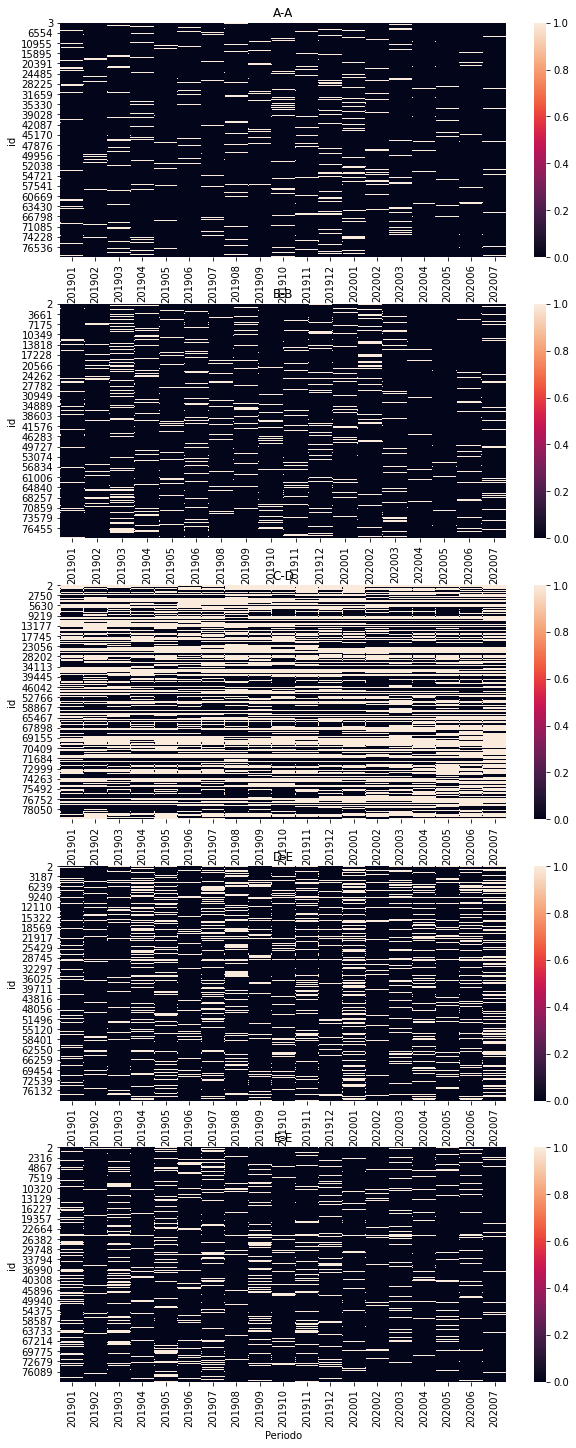

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
fig, axes = plt.subplots(nrows = len(products),figsize = (10,25))
for i,product in enumerate(products):
  mask = ds.products_df["Producto-Tipo"]==product
  pivot_product = pd.pivot_table(data = ds.products_df[mask], index='id', columns='Periodo', values='Monto', fill_value=0)
  table_plot = pivot_product != 0
  sns.heatmap(table_plot, ax=axes[i])
  axes[i].set_title(product)
plt.show()

In [ ]:
temp = [201908,201909,201910,202005,202006,202007]
mask_temp = products_df['Periodo'].apply(lambda x: x in temp)
products_df_temp = products_df[mask_temp].copy()

In [ ]:
products_df_temp

NameError: ignored

In [ ]:
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')

In [ ]:
entrega_df.head()

,productos
id,
1,E-E A-A D-E
2,NaN
3,NaN
4,C-D E-E
5,B-B A-A D-E


## Baseline 6

Order the historic products per user and count. Filling the empty historic products in order of historic occurrence, but sweeping sorted_products to ['D-E', 'C-D', 'E-E', 'B-B', 'A-A'] (last tree month cumulative), instead of sorted_products = ['C-D', 'D-E', 'B-B', 'E-E', 'A-A']

10	juandados	worst_than_better%	19:21 5/12/2020
	

In [ ]:
import numpy as np
from dataset.dataset import Dataset

ds = Dataset()
ds.load_data()

products = ["A-A", "B-B", "C-D", "D-E", "E-E"]
interest_mask = ds.transactions_train_df['Producto-Tipo'].apply(lambda x: x in products)
products_df = ds.transactions_train_df.loc[interest_mask]
products_df = products_df.astype({'Producto-Tipo':'object'}).astype({'Producto-Tipo':'category'})

#sorted_products = [x[0] for x in products_df[['Producto-Tipo']].value_counts().index]
sorted_products = ['D-E', 'C-D', 'E-E', 'B-B', 'A-A']

rank_dict = dict(zip(sorted_products, np.arange(5)[::-1]/10))

def rank(row):
  new_row = row.copy()
  periodo = new_row["Periodo"]
  producto = new_row["Producto-Tipo"]
  new_row["Periodo"] =  rank_dict[producto] if np.isnan(periodo) else periodo
  return new_row

counts_by_product = products_df.groupby(['id','Producto-Tipo'])[['Periodo']].count()
counts_by_product.reset_index(inplace=True)
counts_by_product = pd.DataFrame([ rank(row) for _, row in counts_by_product.iterrows()])
counts_by_product = counts_by_product.sort_values(by=["id","Periodo"], ascending=[True, False])
prediction_lists = counts_by_product.groupby('id').agg({"Producto-Tipo":list})
# Saving file
entrega_df = pd.read_csv(ds.BASE_DATA_PATH / 'ejemplo_entregaVF.csv', index_col='id')
entrega_df['productos'] = [" ".join(x) for x in prediction_lists["Producto-Tipo"]]
from datetime import datetime
filename = ds.BASE_PATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
entrega_df.to_csv(filename)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
